In [2]:
import matplotlib.pyplot as pl
import numpy as np

In [3]:
thresh = 4.04 # 2 sigma of overfiltered BF calculated from 221_CN_threshold notebook.

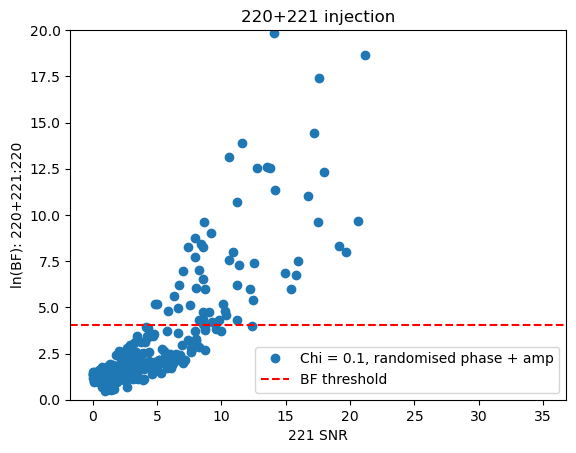

In [4]:
data = np.loadtxt('./results/221_NNI_chi=0.1_random_amp_phase_ALL.dat')
[SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
pl.plot(SNR221, evidence220_221 - evidence220, 'o', label="Chi = 0.1, randomised phase + amp")

# data = np.loadtxt('./results/221_NNI_chi=0.4_random_amp_phase_ALL.dat')
# [SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
# pl.plot(SNR221, evidence220_221 - evidence220, 'o', c='tab:orange', label="Chi = 0.4, randomised phase + amp")

# data = np.loadtxt('./results/221_NNI_chi=0.7_random_amp_phase_ALL.dat')
# [SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
# pl.plot(SNR221, evidence220_221 - evidence220, 'o', c='tab:green', alpha=0.5, label="Chi = 0.7, randomised phase + amp")

pl.axhline(4.04, c='r', ls='--', label="BF threshold")
pl.ylim(0, 20)
pl.xlabel("221 SNR")
pl.ylabel("ln(BF): 220+221:220")
pl.title("220+221 injection")
pl.legend()

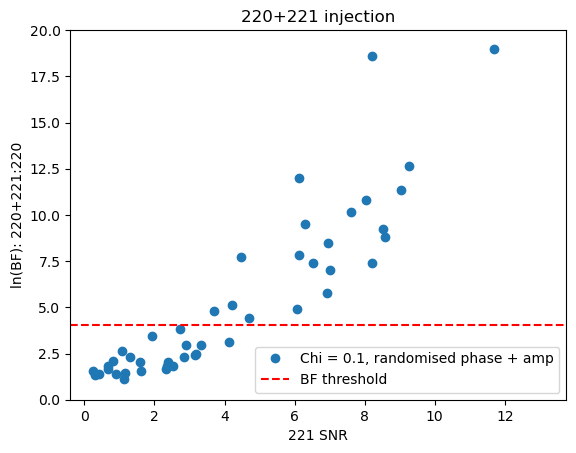

In [8]:
data = np.loadtxt('./results/221_NNI_chi=0.1_random_amp_phase_resSNR_ALL.dat')
[SNRtot, SNR221_res, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
pl.plot(SNR221_res, evidence220_221 - evidence220, 'o', label="Chi = 0.1, randomised phase + amp")

# data = np.loadtxt('./results/221_NNI_chi=0.4_random_amp_phase_ALL.dat')
# [SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
# pl.plot(SNR221, evidence220_221 - evidence220, 'o', c='tab:orange', label="Chi = 0.4, randomised phase + amp")

# data = np.loadtxt('./results/221_NNI_chi=0.7_random_amp_phase_ALL.dat')
# [SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
# pl.plot(SNR221, evidence220_221 - evidence220, 'o', c='tab:green', alpha=0.5, label="Chi = 0.7, randomised phase + amp")

pl.axhline(4.04, c='r', ls='--', label="BF threshold")
pl.ylim(0, 20)
pl.xlabel("221 SNR")
pl.ylabel("ln(BF): 220+221:220")
pl.title("220+221 injection")
pl.legend()

## Calulating the SNR thresholds

In [131]:
data = np.loadtxt('./results/221_NNI_chi=0.4_random_amp_phase_ALL.dat')
[SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data.T
sort_idx = np.argsort(SNR221)
[SNRtot, SNR220, SNR221, evidence220_221, evidence220, evidence221, nofilter] = data[sort_idx].T

In [132]:
def quadratic_no_linear(x, a, b):
    return a*x**2+b

In [133]:
from scipy.optimize import curve_fit
(a, b), J = curve_fit(quadratic_no_linear, SNR221, evidence220_221 - evidence220)
perr = np.sqrt(np.diag(J))

In [134]:
(x, y, z), cov = np.polyfit(SNR221, evidence220_221 - evidence220, deg=2, cov=True)

In [135]:
dx, dy, dz = np.sqrt(np.diag(cov))

In [136]:
# A linear term is needed for good fitting but theoretically this should not be the case

(0.0, 40.0)

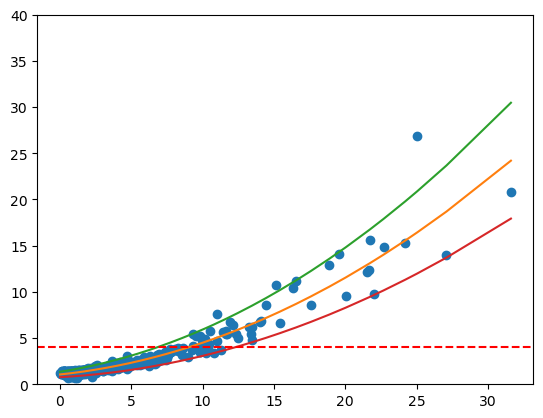

In [137]:
n = 3

pl.plot(SNR221, evidence220_221 - evidence220, 'o')
pl.plot(SNR221, x*SNR221**2+y*SNR221+z)
pl.plot(SNR221, (x+n*dx)*SNR221**2+(y+n*dy)*SNR221+(z+n*dz))
pl.plot(SNR221, (x+-n*dx)*SNR221**2+(y+-n*dy)*SNR221+(z+-n*dz))
pl.axhline(thresh, c='r', ls='--')

pl.ylim(0, 40)
# pl.plot(SNR221, (a+n*perr[0])*SNR221**2+(b+n*perr[1]), 'o')

In [138]:
min_SNR = SNR221[abs((x+n*dx)*SNR221**2+(y+n*dy)*SNR221+(z+n*dz) - thresh).argmin()]
max_SNR = SNR221[abs((x+-n*dx)*SNR221**2+(y+-n*dy)*SNR221+(z+-n*dz) - thresh).argmin()]
print(min_SNR, max_SNR)

6.8546271437525546 12.323042301222076
